In [1]:
#PYTHONPATH
import numpy as np
import matplotlib.pyplot as plt

### Calculate Cost Function
$J(\theta) = \frac{1}{2m} \sum_{i=1}^m (h(x^{(i)}) - y^{(i)})^2$

In [2]:
def calculate_cost_function(x, y, theta0, theta1):
    m = len(x)
    cost = 0
    for i in range(m):
        cost += (x[i] * theta1 + theta0 - y[i]) ** 2
    return 1 / 2 / m * cost

### Gradient Descent Algorithm
$\theta_i := \theta_i - \alpha \frac{\partial J} { \partial \theta_i}$

$\theta = [\theta_0, \theta_1]$

$J(\theta) = \frac{1}{2m} \sum_{i=1}^m (h(x^{(i)}) - y^{(i)})^2$

$\theta_1  := \theta_1 - \alpha \frac{1}{m} \sum_{i=1}^{m} (h(x^{(i)})-y^{(i)})x_1^{(i)}$

$\theta_0  := \theta_0 - \alpha \frac{1}{m} \sum_{i=1}^{m} (h(x^{(i)})-y^{(i)})x_0^{(i)}$

In [3]:
def gradient_descent(x, y, theta0, theta1, alpha, n_iters):
    costs, m = [0 for _ in range(n_iters)], len(x)
    
    costs, t1, t0 = [], [], []
    for j in range(n_iters):
        sumg1, sumg0 = 0, 0
        for i in range(m):
            sumg1 += (x[i] * theta1 + theta0 - y[i]) * x[i]
            sumg0 += (x[i] * theta1 + theta0 - y[i])
        theta1 = theta1 - alpha / m * sumg1
        theta0 = theta0 - alpha / m * sumg0
        t1.append(theta1)
        t0.append(theta0)
        costs.append(calculate_cost_function(x, y, theta0, theta1))
    return costs, t1, t0

In [4]:
x = np.array([68, 60, 51, 43, 31])
y = np.array([37.49, 36.46, 67.28, 93.75, 140.22])
def standardization(x):
    m = len(y)
    mu = np.mean(x)
    sigma = np.std(x)
    x = (x - mu) / sigma
    return x

50.6 12.90891165048394


array([ 1.34790604,  0.72817913,  0.03098635, -0.58874057, -1.51833094])

In [5]:
costs, t1, t0 = gradient_descent(x=x, y=y, theta0=1, theta1=1, alpha=0.05, n_iters=500)
costs[-1], t1[-1], t0[-1]

(41.84036162986078, -37.785524698208924, 75.03999999946141)

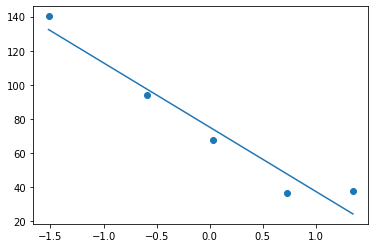

In [6]:
yy = x * t1[-1] + t0[-1]
plt.plot(x, yy)
plt.scatter(x, y)

In [7]:
def de_standardization(theta0, theta1, x):
    mu = np.mean(x)
    sigma = np.std(x)
    theta0 = t0[-1] - t1[-1] * mu / sigma
    theta1 = t1[-1] / sigma 
    return theta0, theta1

(223.15066970550862, -2.927088334111605)

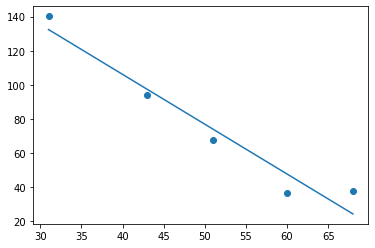

In [8]:
x = np.array([68, 60, 51, 43, 31])
plt.scatter(x, y)
plt.plot(x, theta0 + theta1 * x)

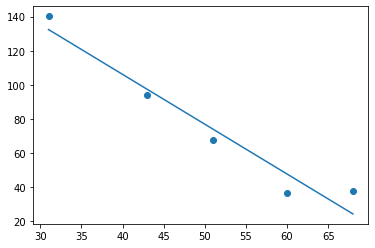

In [13]:
import LinearRegression as lr
import numpy as np
import matplotlib.pyplot as plt

x = np.array([68, 60, 51, 43, 31])
y = np.array([37.49, 36.46, 67.28, 93.75, 140.22])

LR = lr.LinearRegression()
y_hat = LR.fit(x=x, y=y, theta0=1, theta1=1, n_iters=2000)
plt.plot(x, y_hat)
plt.scatter(x, y)